# Assignment 2: Chapter 13

## Due Date:

## 15 points

# Assignment

In [107]:
from datascience import *
import numpy as np
%matplotlib inline

In [108]:
penguin = Table().read_table('penguin_new.csv') #read in csv file using datascience library
penguin = penguin.drop('Unnamed: 0')
penguin

rowid | species | island    | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex    | year
1     | Adelie  | Torgersen | 39.1           | 18.7          | 181               | 3750        | male   | 2007
2     | Adelie  | Torgersen | 39.5           | 17.4          | 186               | 3800        | female | 2007
3     | Adelie  | Torgersen | 40.3           | 18            | 195               | 3250        | female | 2007
5     | Adelie  | Torgersen | 36.7           | 19.3          | 193               | 3450        | female | 2007
6     | Adelie  | Torgersen | 39.3           | 20.6          | 190               | 3650        | male   | 2007
7     | Adelie  | Torgersen | 38.9           | 17.8          | 181               | 3625        | female | 2007
8     | Adelie  | Torgersen | 39.2           | 19.6          | 195               | 4675        | male   | 2007
13    | Adelie  | Torgersen | 41.1           | 17.6          | 182               | 3200        | female | 2007
14    | Adelie  | Torgersen | 38.6           | 21.2          | 191               | 3800        | male   | 2007
15    | Adelie  | Torgersen | 34.6           | 21.1          | 198               | 4400        | male   | 2007
... (323 rows omitted)

### Question 1: 2pt

What are the 25th, 50th and 75th percentiles for the body mass column? Save the median value for future calculations.

In [109]:
# put your code here

Final Answer: 
25th percentile: 3550.0 g
50th percentile: 4050.0 g
75th percentile: 4775.0 g

In [126]:
mass = penguin.column(6)

In [127]:
percentile(25, mass)

3550.0

In [128]:
total_median = percentile(50, mass)
total_median

4050.0

In [129]:
percentile(75, mass)

4775.0

### Question 2: 2pt

This dataset contains 344 samples. Let's pretend that this is the total number of penguins in the world. However, as the data scientist, you only have access to the table of 100 created below. Using these 100 samples, create a function that returns one median for body mass from the 100 values. This functions should be called one_median. Print out one sample median using the one_median function and make sure it is reasonably close to the median you found earlier for the entire dataset. 

In [114]:
new_table = penguin.sample(100, with_replacement=False)
new_table

rowid | species   | island    | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex    | year
72    | Adelie    | Torgersen | 39.7           | 18.4          | 190               | 3900        | male   | 2008
130   | Adelie    | Torgersen | 44.1           | 18            | 210               | 4000        | male   | 2009
311   | Chinstrap | Dream     | 49.7           | 18.6          | 195               | 3600        | male   | 2008
326   | Chinstrap | Dream     | 49.8           | 17.3          | 198               | 3675        | female | 2009
133   | Adelie    | Dream     | 36.8           | 18.5          | 193               | 3500        | female | 2009
207   | Gentoo    | Biscoe    | 46.5           | 14.4          | 217               | 4900        | female | 2008
171   | Gentoo    | Biscoe    | 46.2           | 14.5          | 209               | 4800        | female | 2007
96    | Adelie    | Dream     | 40.8           | 18.9          | 208               | 4300        | male   | 2008
294   | Chinstrap | Dream     | 58             | 17.8          | 181               | 3700        | female | 2007
261   | Gentoo    | Biscoe    | 43.3           | 14            | 208               | 4575        | female | 2009
... (90 rows omitted)

In [115]:
# put your code here

In [116]:
# function to create one median
def one_median(original_table):
    #takes a sample from the original_table with replacement that is the same size as the original_table
    resample = original_table.sample()
    # Finds the median of the body_mass_g column in the new sample
    median = percentile(50, resample.column("body_mass_g"))
    return median

In [117]:
one_median(new_table)

4375.0

### Question 3: 2pt

Now create another function that utilizes the one_median function in a loop to create an array of medians. This function should be called array_of_medians. The user should be able to input two values: the table and the number of medians in the array. Then make and print out an array with 100 medians. 

In [118]:
#Put your code here

In [119]:
# Function that creates an array of medians created by the one_median function. Size is specified by user
def multiple_medians(original_table, how_many):
    # Make a blank array
    array_of_medians = make_array()
    # loops the one_median function and adds each median to the end of the array
    for i in range(how_many):
        array_of_medians = np.append (array_of_medians, one_median(original_table))
    return array_of_medians

In [120]:
array_of_medians = multiple_medians(new_table, 100)
array_of_medians

array([ 3900.,  4100.,  4300.,  3950.,  4100.,  4200.,  4300.,  3950.,
        4100.,  4200.,  4050.,  4200.,  4100.,  4100.,  4300.,  4100.,
        3950.,  4250.,  4050.,  4100.,  4300.,  3900.,  4200.,  4400.,
        4200.,  4300.,  4050.,  4300.,  4300.,  4275.,  4000.,  4000.,
        4050.,  4000.,  4050.,  4300.,  4000.,  4050.,  4050.,  4050.,
        4275.,  4250.,  4050.,  4275.,  4050.,  4300.,  3900.,  4000.,
        4050.,  3750.,  4200.,  4200.,  4275.,  4300.,  4300.,  4100.,
        4200.,  4200.,  4375.,  3800.,  4250.,  3950.,  3900.,  4200.,
        4500.,  4000.,  4000.,  4050.,  4100.,  3800.,  4250.,  4275.,
        4400.,  3950.,  4400.,  4200.,  4300.,  4000.,  4300.,  4250.,
        4500.,  3900.,  4300.,  3800.,  4200.,  4200.,  4050.,  4100.,
        4050.,  4100.,  4050.,  4400.,  4300.,  4250.,  4050.,  4000.,
        4100.,  4050.,  4300.,  4300.])

### Question 4: 2pt

Using the array of 100 sample medians, create a table with those values. Using the table, create a histogram with the Bootstrap Sample Median of Penguin Mass as the x-axis and the Percent per unit as the y-axis. Use .arange to set the parameters to 3800 and 4300 and the bin width to 10.


In [121]:
# Put your code here

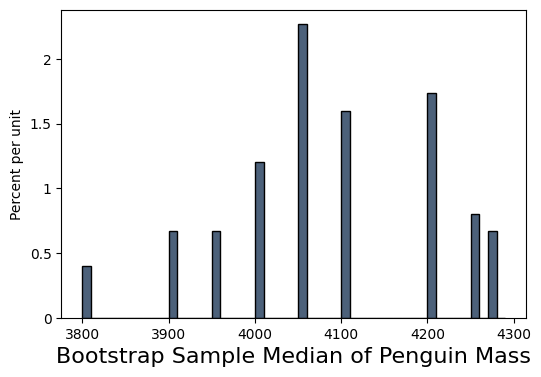

In [122]:
# Create a table with the array of medians
table_of_medians = Table().with_column('Bootstrap Sample Median of Penguin Mass', array_of_medians)
median_bins = np.arange(3800, 4300, 10)
# Create a histogram with the table
table_of_medians.hist(bins = median_bins)

### Question 5: 2pt

How does this compare to the median we found in the beggining for the complete dataset? What else do you observe about this visualization?

Put your answer here

The median we found earlier, 4050.0 is the most frequently found sample median. Can have different answer but most frequent median should be around 4050.0

# Bonus

## Bonus Material : Creating a Dot Plot Where a third variable is shown through the color of the dots. 

In [44]:
# First, we import the patches library from matplotlib. This is used to create the legend later on
import matplotlib.patches as mpatches

In [45]:
# Next, we take our original penguin dataset and change it into a pandas dataframe so we can do more 
#complex graphing
penguin_df= penguin.to_df()

In [46]:
# Next we assign colors to each of the categories in the third variable.
# For this example we want sex to be the colored variables.
# Therefore we will assign male to blue and female to pink.
colors = {'male': 'blue', 'female': 'pink'}

In [47]:
# Next, we assign each value in the sex column a color based on its sex. This returns an array. 
color_list = [colors[group] for group in penguin_df['sex']]

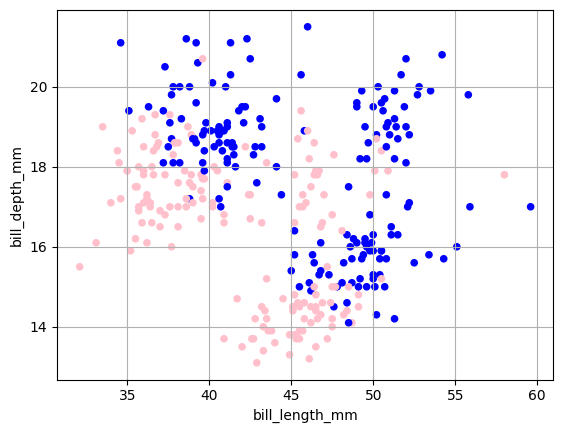

In [48]:
# Next, we will create a scatterplot using the columns bill_length_mm and bill_depth_mm.
# To add the colors we use c = color_list (created in the last step)
# To create the grid for easier viewing use grid = True
bill_length_width_by_sex = penguin_df.plot.scatter('bill_length_mm','bill_depth_mm', 
                                                   c=color_list, grid = True)

In [49]:
# To create a legend use the patches library to create a patch with the color that is associated to each value
# and the title of that value
legend_handles = [mpatches.Patch(color=colors['male'], label='male'),mpatches.Patch(color=colors['female'], label='female')]

In [50]:
# Finally we add the legend to the upper left corner of the graph. 
bill_length_width_by_sex.legend(handles=legend_handles, loc='upper left')

As you can see, by adding a third variable of the color of the dots on the graph, it is easier to visualize patterns and overall trends between all three variables. For instance, this graph shows that on average, male penguins have a longer bill length and bill depth. 

## Now its your turn! 

### Question 1: 2pt

You will creating the same graph but to find the overall trends of penguin species using the ratio of bill_depth and bill_length and the flipper length. 

To start, create a new table that contains species, bill length, bill depth, flipper length and create a new column with the ratio of bill length to depth. Don't forget to change this table into a pandas dataframe. If you are unsure if you have, you can use print(type(table)). Print out the first 10 values of your new table. 

In [51]:
# Put your code here

In [52]:
# Creates a new table with the specified columns and a column with the ration of bill_length / bill_depth
BL_BD_ratio = penguin.select('species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm').with_columns(
    'Ratio BL:BD', penguin.column('bill_length_mm')/penguin.column('bill_depth_mm')
)
# Changes into a pandas dataframe
ratio_df= BL_BD_ratio.to_df()
print(type(BL_BD_ratio))
BL_BD_ratio

<class 'datascience.tables.Table'>


species | bill_length_mm | bill_depth_mm | flipper_length_mm | Ratio BL:BD
Adelie  | 39.1           | 18.7          | 181               | 2.09091
Adelie  | 39.5           | 17.4          | 186               | 2.27011
Adelie  | 40.3           | 18            | 195               | 2.23889
Adelie  | 36.7           | 19.3          | 193               | 1.90155
Adelie  | 39.3           | 20.6          | 190               | 1.90777
Adelie  | 38.9           | 17.8          | 181               | 2.18539
Adelie  | 39.2           | 19.6          | 195               | 2
Adelie  | 41.1           | 17.6          | 182               | 2.33523
Adelie  | 38.6           | 21.2          | 191               | 1.82075
Adelie  | 34.6           | 21.1          | 198               | 1.63981
... (323 rows omitted)

### Question 2: 2pt

Next, use the steps you used above to create a scatterplot where the x-axis is the bill_length to bill_depth ratio, the y-axis is the flipper length, and the dots are colored by the three species, Adelie, Chinstrap and Gentoo. Choose whatever colors you would like for each species. Don't forget to make a legend. 

In [53]:
# Put your code here

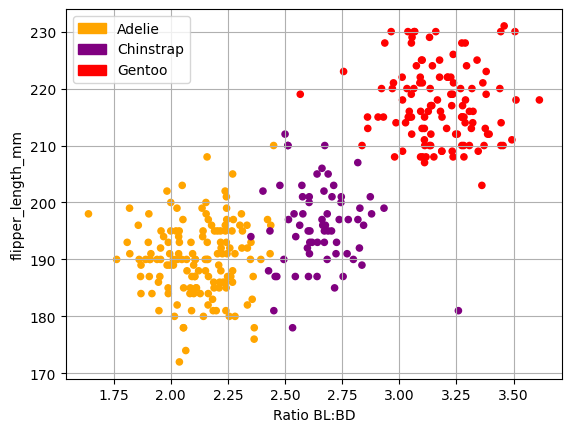

In [54]:
colors = {'Adelie': 'orange', 'Chinstrap': 'purple','Gentoo': 'red' }
color_list = [colors[group] for group in ratio_df['species']]
bill_ratio_flipper_length_species = ratio_df.plot.scatter('Ratio BL:BD','flipper_length_mm', c=color_list, grid = True)
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=colors['Adelie'], label='Adelie'),mpatches.Patch(color=colors['Chinstrap'], label='Chinstrap'),mpatches.Patch(color=colors['Gentoo'], label='Gentoo')]
bill_ratio_flipper_length_species.legend(handles=legend_handles, loc='upper left')

### Question 3: 1pt

What do you notice about the different species of penguins in this graph?

Type your answer here

The Adelie species has the lowest BL to BD ration as well as the smallest flipper length. The chinstrap has a ratio and flipper length that is in the middle and the Gentoo species has the highest ratio and flipper length. Overall each species has similar ratios and flipper lengths leading to fairly clear clustering.